# DX 602 Final Project

## Introduction

In this project, you will practice the skills that you have learned throughout this module with a heavy focus on building models.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform build models, run a computation, or otherwise perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
The Thanksgiving holiday was also taken into account in setting the deadline.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [1]:
import math
import sys

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - red subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_red))
* [Body Fat](https://www.openml.org/search?type=data&status=active&id=560) ([PMLB](https://github.com/EpistasisLab/pmlb/tree/master/datasets/560_bodyfat))

The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the dataset has missing data, you should drop the rows with missing data before proceeding.
If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [5]:
# YOUR CODE HERE

# import data file:
df_bf = pd.read_csv("560_bodyfat.tsv.gz", sep="\t", compression="gzip")
df_bf.sample(10)

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,target
246,1.0308,69.0,215.50,70.50,40.799999,113.699997,107.599998,110.000000,63.299999,44.000000,22.600000,37.500000,32.599998,18.799999,30.200001
190,1.0728,41.0,153.00,69.25,36.400002,91.400002,80.599998,92.300003,54.299999,36.299999,21.799999,29.600000,27.299999,17.900000,11.400000
71,1.0788,55.0,146.75,68.75,38.700001,88.500000,82.800003,95.500000,58.900002,37.599998,21.600000,30.299999,27.299999,18.299999,8.800000
83,1.0377,70.0,170.75,70.00,38.700001,101.800003,94.900002,95.000000,56.000000,36.500000,24.100000,31.200001,27.299999,19.200001,27.000000
195,1.0411,42.0,180.00,68.25,38.500000,101.599998,96.599998,100.599998,61.099998,38.400002,24.100000,32.900002,29.799999,18.799999,25.500000
179,1.0603,39.0,234.75,74.50,42.799999,109.500000,104.500000,109.900002,69.500000,43.099998,25.799999,39.099998,32.500000,19.900000,16.900000
66,1.0499,54.0,151.50,70.75,35.599998,90.000000,83.900002,93.900002,55.000000,36.099998,21.700001,29.600000,27.400000,17.400000,21.500000
249,1.0328,72.0,186.75,66.00,38.900002,111.099998,111.500000,101.699997,60.299999,37.299999,21.500000,31.299999,27.200001,18.000000,29.299999
55,1.0473,54.0,198.00,72.00,39.900002,107.599998,100.000000,99.599998,57.200001,38.000000,22.000000,35.900002,30.200001,18.900000,22.600000
181,1.1089,40.0,118.50,68.00,33.799999,79.300003,69.400002,85.000000,47.200001,33.500000,20.200001,27.700001,24.600000,16.500000,0.000000


In [6]:
df_bf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   Age      252 non-null    float64
 2   Weight   252 non-null    float64
 3   Height   252 non-null    float64
 4   Neck     252 non-null    float64
 5   Chest    252 non-null    float64
 6   Abdomen  252 non-null    float64
 7   Hip      252 non-null    float64
 8   Thigh    252 non-null    float64
 9   Knee     252 non-null    float64
 10  Ankle    252 non-null    float64
 11  Biceps   252 non-null    float64
 12  Forearm  252 non-null    float64
 13  Wrist    252 non-null    float64
 14  target   252 non-null    float64
dtypes: float64(15)
memory usage: 29.7 KB


YOUR ANSWERS HERE


Per the info shown in the cell above, it appears that there's no missing data as described by the info() method that there're 252 instances or rows, 15 features or columns and every single row has non-null entry.

### Problem 2 (10 points)

List all of the columns and describe them in your own words.

In [7]:
# YOUR CODE HERE

print(df_bf.columns)

Index(['Density', 'Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip',
       'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist', 'target'],
      dtype='object')


YOUR ANSWERS HERE

* Density: supposedly a standardized measurement metric of informing the volume of a human body that is based on the composition of their lean and fat tissues
* Age: measured in the unit of years that an instance (e.g. a man) have lived 
* Weight: measured in the unit of pounds for an instance 
* Height: measured in the unit of inches for an instance
* Neck: measured neck circumference in the unit of cm for an instance
* Chest: measured chest circumference in the unit of cm for an instance
* Abdomen: measured abdomen circumference in the unit of cm for an instance
* Hip: measured abdomen circumference in the unit of cm for an instance
* Thigh: measured thigh circumference in the unit of cm for an instance
* Knee: measured knee circumference in the unit of cm for an instance
* Ankel: measured ankel circumference in the unit of cm for an instance
* Biceps: measured biceps circumference in the unit of cm for an instance
* Forearm: measured forearm circumference in the unit of cm for an instance
* Wrist: measured wrist circumference in the unit of cm for an instance
* target: supposedly a standardized measurement metric of estimating body fat in terms of percentage of body weight determined by an instance's dentsity and their body circumference (e.g. abdomen, neck, etc.) with their age (e.g. a one directional variable that has indication power) and the relative constant facotrs like weight and height; for another instance, the higher the target number is the more fat an instance has

### Problem 3 (50 points)

Perform an exploratory analysis of the data set.
After your exploratory analysis, pick 3 individual charts that you the think were particularly interesting.
Repeat those charts separately from your original analysis, and after each of those charts, explain what you thought was noteworthy.

body_fat_dataset.shape = 
(252, 15)

summary statistics:
          Density         Age      Weight      Height        Neck       Chest  \
count  252.000000  252.000000  252.000000  252.000000  252.000000  252.000000   
mean     1.055574   44.884921  178.924405   70.148810   37.992064  100.824206   
std      0.019031   12.602040   29.389160    3.662856    2.430913    8.430476   
min      0.995000   22.000000  118.500000   29.500000   31.100000   79.300003   
25%      1.041400   35.750000  159.000000   68.250000   36.400002   94.350000   
50%      1.054900   43.000000  176.500000   70.000000   38.000000   99.649998   
75%      1.070400   54.000000  197.000000   72.250000   39.425001  105.375002   
max      1.108900   81.000000  363.149994   77.750000   51.200001  136.199997   

          Abdomen         Hip       Thigh        Knee       Ankle      Biceps  \
count  252.000000  252.000000  252.000000  252.000000  252.000000  252.000000   
mean    92.555952   99.904762   59.405952   38.5904

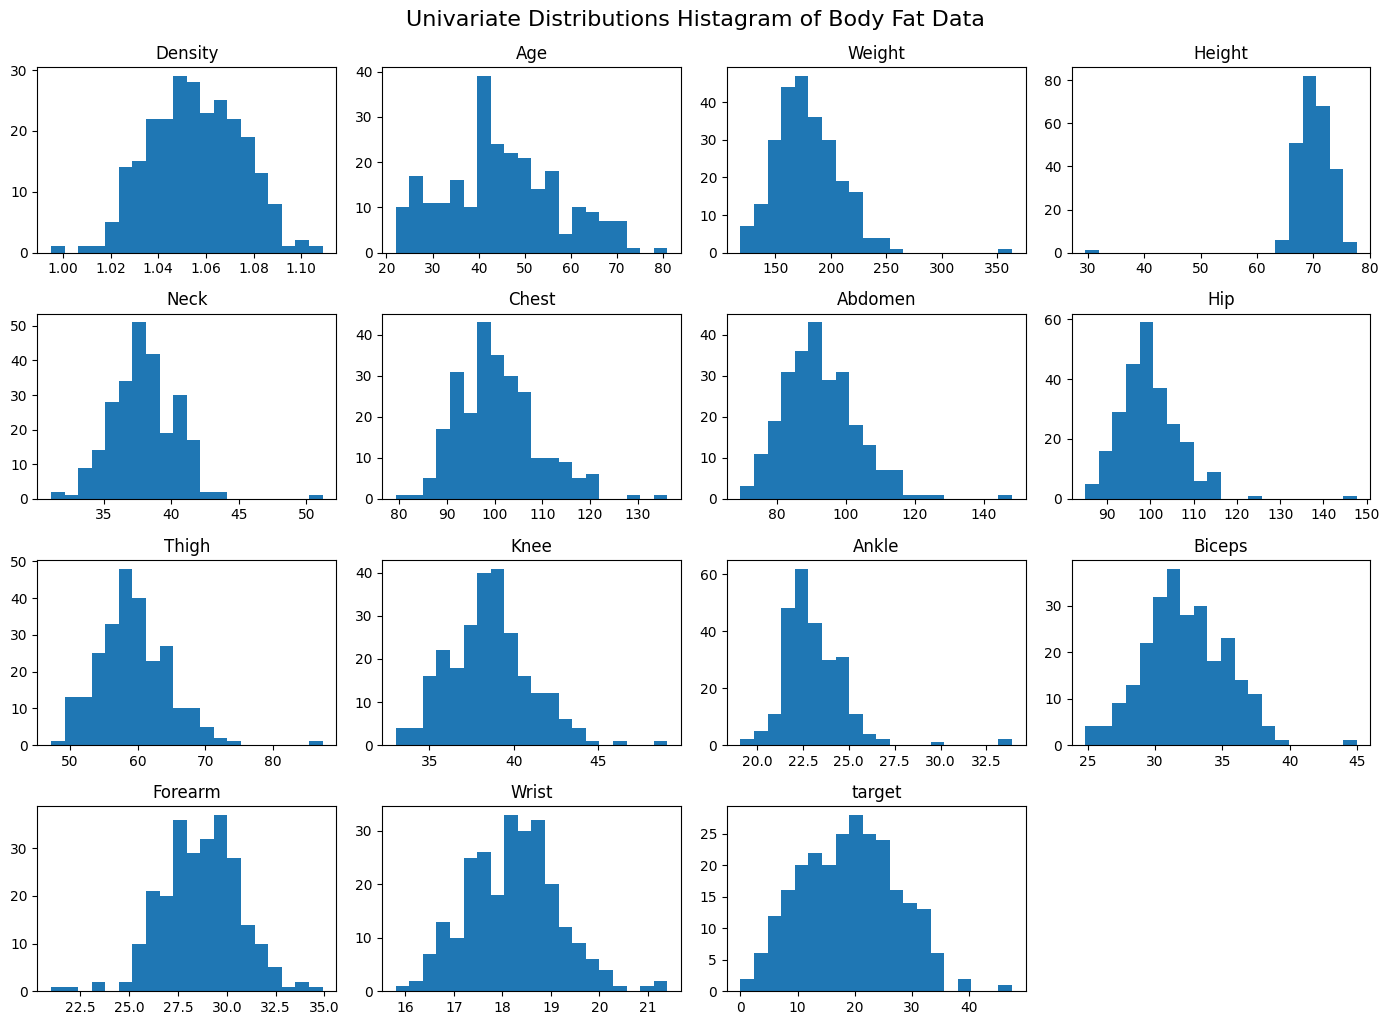

Bivariate Analysis 1 Scatterplot of Body Fat Data


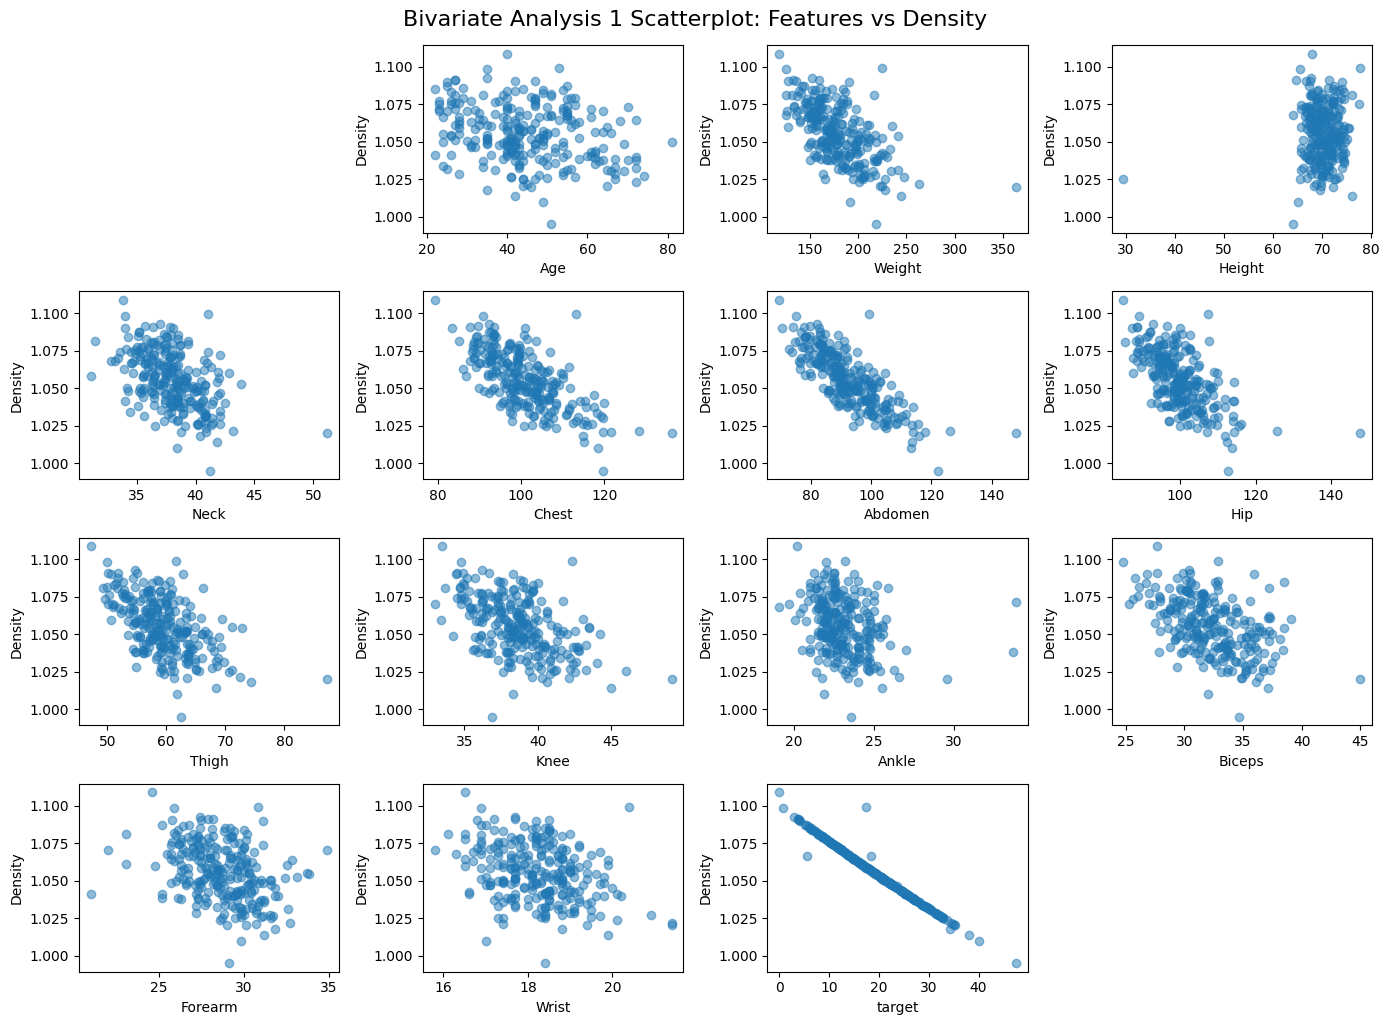

Bivariate Analysis 2 Correlaion Matrix Heatmap of Body Fat Data


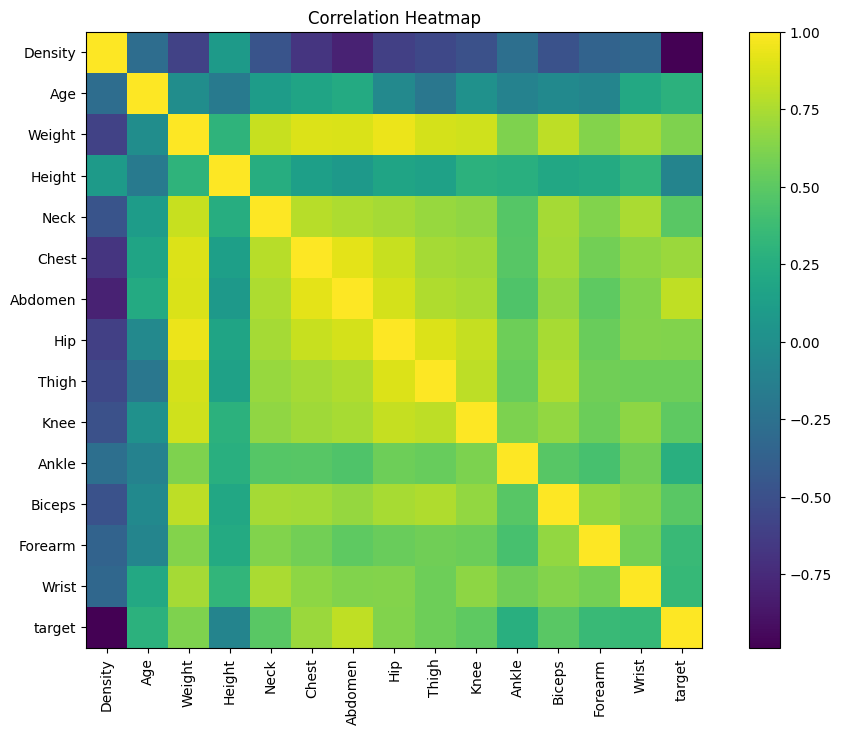

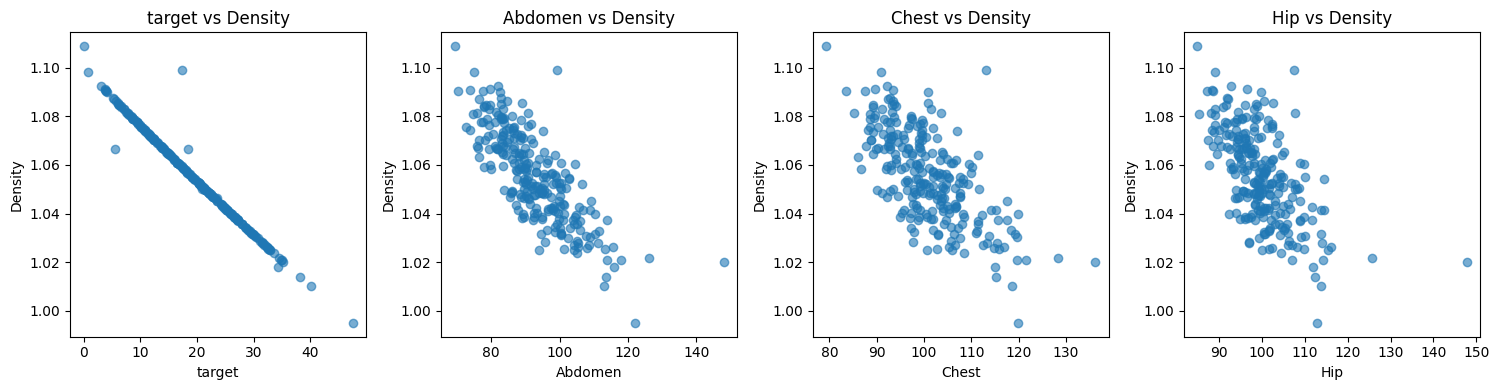

In [8]:
# YOUR CODE HERE

#Step 1 (Inital EDA of the dataset):
print(f'body_fat_dataset.shape = \n{df_bf.shape}\n')
print(f'summary statistics:\n{df_bf.describe()}\n')
print(f'summary of missing values & data types:\n{df_bf.info()}\n')
print(f'sample data:\n{df_bf.head(10)}')

#Step 2 (a. Visualize relationships between variables & b. understand distributions):

# a. Univariate analysis to visualize relationships between variables:
print("Univariate Distributions Histagram of Body Fat Data")
plt.figure(figsize=(14, 10))
numeric_cols = df_bf.select_dtypes(np.number).columns.tolist()

for i, col in enumerate(numeric_cols):
    plt.subplot(4, 4, i+1)
    plt.hist(df_bf[col], bins=20)
    plt.title(col)
    plt.tight_layout()

plt.suptitle("Univariate Distributions Histagram of Body Fat Data", fontsize=16, y=1.02)
plt.show()

# b. Bivariate analysis to understand distributions:

# Make Scatterplots - each feature vs density (which is the proxy used for body fat% calc):
print("Bivariate Analysis 1 Scatterplot of Body Fat Data")

target = 'Density'

plt.figure(figsize=(14, 10))
for i, col in enumerate(numeric_cols):
    if col == target:
        continue
    
    plt.subplot(4, 4, i+1)
    plt.scatter(df_bf[col], df_bf[target], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel(target)
    plt.tight_layout()
    
plt.suptitle(f"Bivariate Analysis 1 Scatterplot: Features vs {target}", fontsize=16, y=1.02)
plt.show()

# Plot Correlation Matrix Heat Maps (Matplotlib only):
print("Bivariate Analysis 2 Correlaion Matrix Heatmap of Body Fat Data")

plt.figure(figsize=(12, 8))

corr = df_bf.corr(numeric_only=True)
plt.imshow(corr, interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap")
plt.show()
    
# # Find the highest correlated features:
corr_target = corr[target].abs().sort_values(ascending=False)
top3_features = corr_target.index[1:5].tolist()  # Exclude density itself

plt.figure(figsize=(15, 4))

for i, col in enumerate(top3_features):
    plt.subplot(1, 4, i+1)
    plt.scatter(df_bf[col], df_bf[target], alpha=0.6)
    plt.xlabel(col)
    plt.ylabel(target)
    plt.title(f"{col} vs {target}")

plt.tight_layout()
plt.show()



YOUR ANSWERS HERE

1. Reason why to select Chart 1 (Histogram of Body Fat Percentage):
   
   This reveals the distribution of the outcome variable. This distribution provides essential insights into body fat values the model must learn. It shows whether the data are skewed, whether there're extreme values, whether prediction difficulty may differ across regions of the distribution
2. Chart 2 (Scatterplot of Abdomen Circumference vs. Body Fat %):
   
   Per the EDA analysis above, Abdomen feature is shown to be the strongest linear predictor among all the other features. The upward trend suggests that abdominal circumference is a major predictor of body fat%. Its strength also indicates that linear models may perform reasonably well.
3. Chart 3:
   
   This exposes variable relationships and helps identify which measurements are most predictive versus redundant. In addition, it helps reveal the structual relationships among all numerical variables. It highlights which features are redudant (aka multicollinearity) and which provide unique predictive value. This info guides later modeling steps, such as feature selection and regularization choices, and is essential for diagnosing potential instablility in linear models.

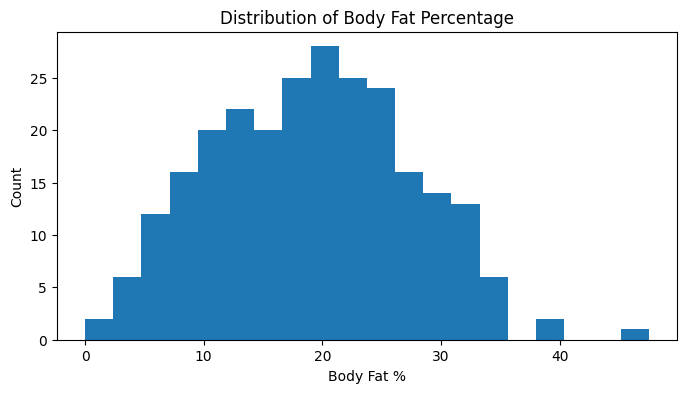

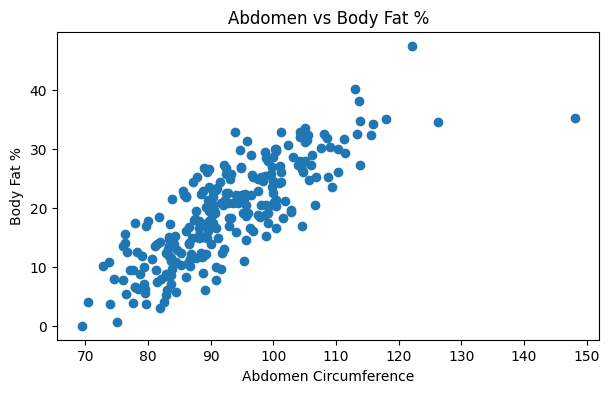

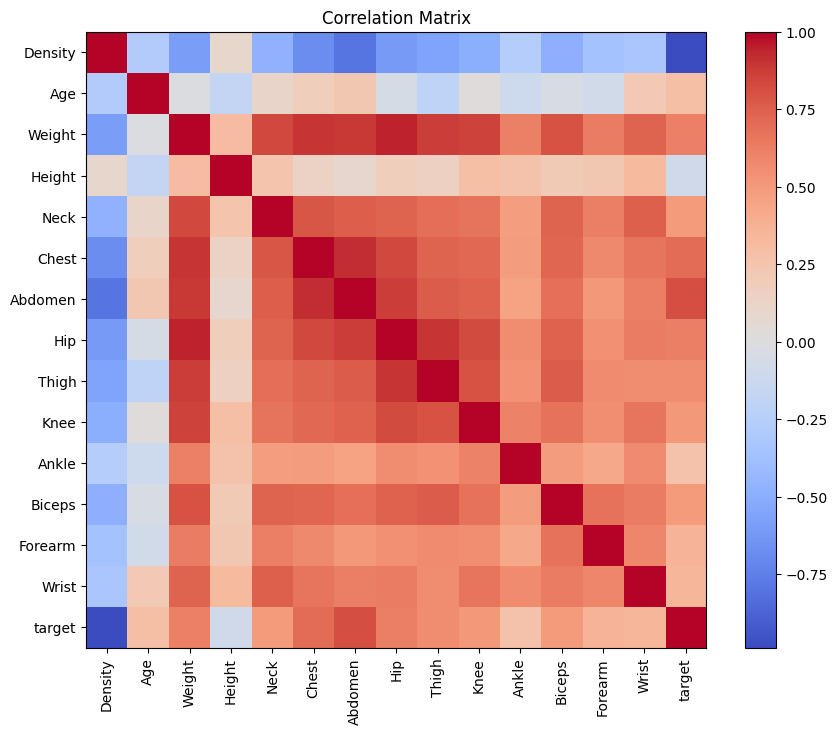

In [9]:
# Chart 1 from EDA
plt.figure(figsize=(8, 4))
plt.hist(df_bf["target"], bins=20)
plt.xlabel("Body Fat %")
plt.ylabel("Count")
plt.title("Distribution of Body Fat Percentage")
plt.show()

# Chart 2:
plt.figure(figsize=(7, 4))
plt.scatter(df_bf["Abdomen"], df_bf["target"])
plt.xlabel("Abdomen Circumference")
plt.ylabel("Body Fat %")
plt.title("Abdomen vs Body Fat %")
plt.show()

# Chart 3:
plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap="coolwarm", aspect="auto")
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Matrix")
plt.show()


### Problem 4 (5 points)

Plot the correlation matrix of the numeric columns in the data set.
Which pair of different columns were highlighted as the most correlated?

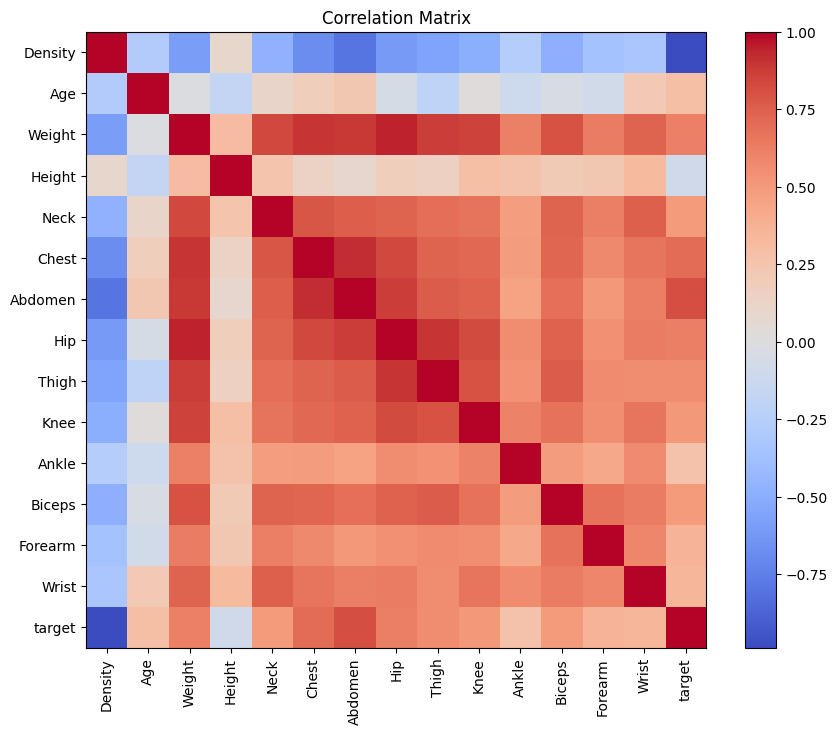

In [ ]:
# YOUR CODE HERE
plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap="coolwarm", aspect="auto")
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Matrix")
plt.show()


YOUR ANSWERS HERE

Abdomen and target is the most correlated pair of different columns.

### Problem 5 (10 points)

Pick three different regression model classes to try in problem 6 from the scikit-learn documentation.
For each class, provide a link to the scikit-learn documentation, and a link to another web page describing how that kind of model works.
The second link should not be from scikit-learn, but Wikipedia is acceptable.
You do not need to understand the methods at this time, but it is good to be comfortable researching them.

In [11]:
# YOUR CODE HERE
import sklearn.linear_model
from sklearn.tree import DecisionTreeRegressor

# -----------------------------
# Prepare X and y
# -----------------------------
X = df_bf.drop(columns=["target"])
y = df_bf["target"]

# -----------------------------
# 1. Linear Regression
# https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares
# https://en.wikipedia.org/wiki/Linear_regression
# -----------------------------
model_lr = sklearn.linear_model.LinearRegression()
model_lr.fit(X, y)

print("Linear Regression Coefficients:")
print(model_lr.coef_)
print()

# -----------------------------
# 2. Ridge Regression
# https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression
# https://en.wikipedia.org/wiki/Ridge_regression
# -----------------------------
model_ridge = sklearn.linear_model.Ridge(alpha=1.0)
model_ridge.fit(X, y)

print("Ridge Regression Coefficients:")
print(model_ridge.coef_)
print()

# -----------------------------
# 3. Decision Tree Regression
# https://scikit-learn.org/stable/modules/tree.html#regression
# https://en.wikipedia.org/wiki/Decision_tree_learning
# -----------------------------
model_tree = DecisionTreeRegressor(max_depth=5, random_state=0)
model_tree.fit(X, y)

print("Decision Tree Feature Importances:")
print(model_tree.feature_importances_)
print()


Linear Regression Coefficients:
[-4.11237960e+02  1.25871698e-02  1.00544847e-02 -7.98055974e-03
 -2.84572307e-02  2.67799661e-02  1.85650213e-02  1.91651199e-02
 -1.67574604e-02 -4.64115958e-03 -8.56767764e-02 -5.50512878e-02
  3.38641841e-02  7.34553244e-03]

Ridge Regression Coefficients:
[-9.57320091  0.06043516 -0.0865386  -0.06861486 -0.46176768 -0.02235134
  0.93309861 -0.20187476  0.23037201  0.01433647  0.16514478  0.17567014
  0.4397032  -1.55926437]

Decision Tree Feature Importances:
[9.88747548e-01 2.68988445e-03 1.14365794e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 8.44820206e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]



YOUR ANSWERS HERE

### Problem 6 (50 points)

Build three different regression models using the entire data set.
Plot the actual target vs the predicted values for each in one chart.
Compute the L2 and L1 losses for each of them.
You may use any regression class provided provided by scikit-learn, and you may reuse one class as long as you change its parameters enough to see different results.

L2/L1 Losses Results
               Model        MSE       MAE
0  Linear Regression   1.527204  0.480196
1   Ridge Regression  16.770627  3.367043
2   Lasso Regression  17.579144  3.438807


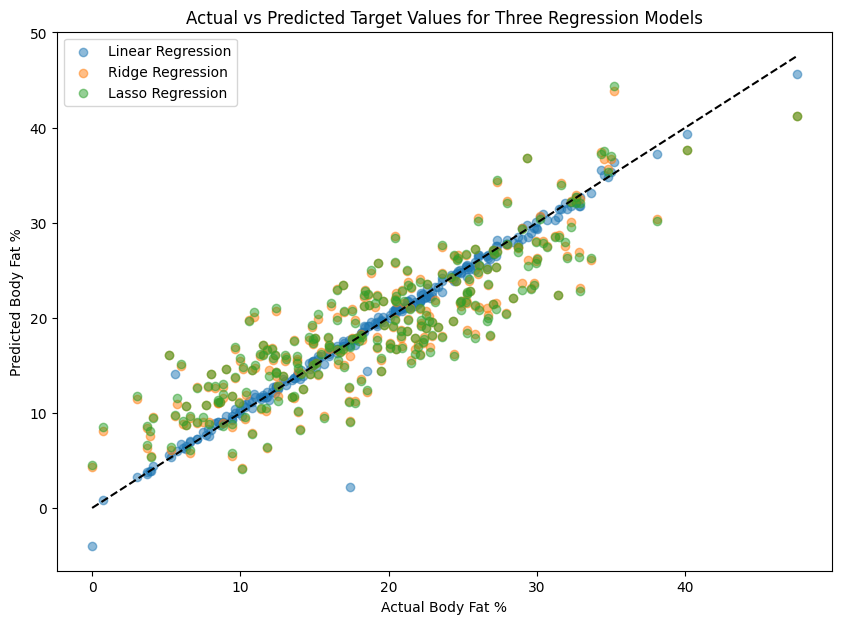

In [12]:
# YOUR CODE HERE

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error

X = df_bf.drop(columns=["target"])
y = df_bf["target"]

# 1. Linear Regression
m1 = LinearRegression().fit(X, y)
pred1 = m1.predict(X)

# 2. Ridge Regression (with regularization)
m2 = Ridge(alpha=1.0).fit(X, y)
pred2 = m2.predict(X)

# 3. Lasso Regression (stronger regularization)
m3 = Lasso(alpha=0.1, max_iter=5000).fit(X, y)
pred3 = m3.predict(X)

results = pd.DataFrame({
    "Model": ["Linear Regression", "Ridge Regression", "Lasso Regression"],
    "MSE": [
        mean_squared_error(y, pred1),
        mean_squared_error(y, pred2),
        mean_squared_error(y, pred3),
    ],
    "MAE": [
        mean_absolute_error(y, pred1),
        mean_absolute_error(y, pred2),
        mean_absolute_error(y, pred3),
    ],
})

print("L2/L1 Losses Results")
print(results)

# --- Plot actual vs predicted ---
plt.figure(figsize=(10,7))

plt.scatter(y, pred1, alpha=0.5, label="Linear Regression")
plt.scatter(y, pred2, alpha=0.5, label="Ridge Regression")
plt.scatter(y, pred3, alpha=0.5, label="Lasso Regression")

plt.plot([y.min(), y.max()], [y.min(), y.max()], "k--")  # 45-degree line
plt.xlabel("Actual Body Fat %")
plt.ylabel("Predicted Body Fat %")
plt.title("Actual vs Predicted Target Values for Three Regression Models")
plt.legend()

YOUR ANSWERS HERE

Visually, it appears that Linear regression model performs the best among the 3 models as opposed to cloudy of Ridge & Lasso regression.

### Problem 7 (30 points)

Use 5-fold cross-validation to repeat building the same three kinds of regression models. Compare the L2 losses predicted by cross-validation against the L2 losses training against the whole data set. (The difference is likely from overfitting in the latter.)

In [13]:
# YOUR CODE HERE

from sklearn.model_selection import KFold, cross_val_score

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1)
}

results = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    
    model.fit(X, y)
    train_pred = model.predict(X)
    train_mse = mean_squared_error(y, train_pred)
    
    # Cross-validation MSE
    cv_mse_scores = -cross_val_score(
        model, X, y, cv=kf, scoring="neg_mean_squared_error"
    )
    cv_mse = np.mean(cv_mse_scores)

    results.append([name, train_mse, cv_mse])

cv_results = pd.DataFrame(results, columns=["Model", "Train MSE", "5-Fold CV MSE"])
cv_results

,Model,Train MSE,5-Fold CV MSE
0,Linear Regression,1.527204,2.003088
1,Ridge Regression,16.770627,21.101545
2,Lasso Regression,17.579144,21.608454


YOUR ANSWERS HERE

All three models show signs of overfitting because CV MSE > Train MSE.

The amount of overfitting tells:

* Linear Regression fits data well with small overfit → best model

* Ridge & Lasso force too much shrinkage → hurt accuracy → underfit + still overfit noise

### Problem 8 (25 points)

Build three different regression models as in problem 6, but preprocess the data so that each column has mean zero and standard deviation one first.
For full credit, use a scikit-learn pipeline for each model.
For each model, compare the L2 losses -- which of them performed differently from your results in problem 6?

(This process will be covered in week 13.)

In [16]:
# YOUR CODE HERE

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Preprocessing the data:
pipe_lr = make_pipeline(StandardScaler(), LinearRegression())
pipe_lr.fit(X, y)
pred_lr = pipe_lr.predict(X)
mse_lr = mean_squared_error(y, pred_lr)

pipe_ridge = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
pipe_ridge.fit(X, y)
pred_ridge = pipe_ridge.predict(X)
mse_ridge = mean_squared_error(y, pred_ridge)

pipe_lasso = make_pipeline(StandardScaler(), Lasso(alpha=0.1, max_iter=10000))
pipe_lasso.fit(X, y)
pred_lasso = pipe_lasso.predict(X)
mse_lasso = mean_squared_error(y, pred_lasso)

results_scaled = pd.DataFrame({
    "Model": ["Linear Regression", "Ridge Regression", "Lasso Regression"],
    "Scaled MSE:": [mse_lr, mse_ridge, mse_lasso]
})

print("Scaled Data L2/L1 Losses Results:")
print(results_scaled)
print()
print("Pre-scaled Data L2/L1 Losses Results:")
print(cv_results)


Scaled Data L2/L1 Losses Results:
               Model  Scaled MSE:
0  Linear Regression     1.527204
1   Ridge Regression     1.530502
2   Lasso Regression     1.570544

Pre-scaled Data L2/L1 Losses Results:
               Model  Train MSE  5-Fold CV MSE
0  Linear Regression   1.527204       2.003088
1   Ridge Regression  16.770627      21.101545
2   Lasso Regression  17.579144      21.608454


YOUR ANSWERS HERE

After scaling, Ridge and Lasso regression models performed very differently, improving dramatically and achieving MSE values close to Linear Regression. Linear Regression's performance did not change because it is not affected by feature scale. This confirms that feature scaling is cruial for regularized models, as it ensures penalties are applied evenly across all features.

In addition and it's after scaling again, Ridge ≈ Linear Regression in performance and Lasso is slightly worse. This suggests that the dataset likely has some correlated features, Ridge handles multicollinearity better than Lasso, and Lasso may be shrinking some useful coefficients too aggressively.

### Problem 9 (5 points)

A colleague suggests that you find better models by repeatedly building decision trees with random depth limits.
They say that trying 1000 such models will likely find an improvement as long as you use cross validation.
Give a one sentence response to this suggestion. 

In [ ]:
# YOUR CODE HERE
# NA

YOUR ANSWERS HERE

Randomly trying 1000 decision trees with different depth limits may find a better-performing model, but without a principled search strategy or validation plan it is inefficient and risks tuning to noise rather than learning a genuinely better generalizable model.

### Problem 10 (10 points)

Pick a best model from all the models that you built and otherwise described in this project.
Explain how you picked it, including what criteria you chose, and how the other models compared by that criteria.
As much as possible, justify that problem in the context of the original data set. 

In [ ]:
# YOUR CODE HERE
# NA

YOUR ANSWERS HERE

The best model I chose is Linear Regression after standardizing all features (mean 0, std 1).

My criteria is the following:

1. Generalization peferomance: I compared models using cross-validated L2 loss (MSE), not just training error. The scaled LR had the lowest CV MSE, indicating the best expected performance on unseen data.
2. Stability & bias-variance tradeoff: After scaling, Ridge and Lasso no longer severely underperformed, but neithor improved beyond LR. Ridge and Lasso introduced extra bias without sufficient variance reduction for this dataset.
3. Interpretability: LR provides direct, interpretable coefficients, which is valuable for the body-fat dataset where understanding how measurements (abdomen, hip, chest, etc.) relate to body fat% is meaningful.
4. Data characteristics: the dataset is small-to-medium sized, with strong linear relationships and high multicollinearity among body measurements; Standardization addressed scale issues and allowed LR to perform well without heavy regularization; More complex models (e.g. trees or random forests) risk overfitting, especially given correlated predictors and limited data.

How other models compared:
* Unscaled Ridge/Lasso: Performed poorly due to feature scale differences overwhelming regularization.
* Scaled Ridge/Lasso: Performance improved dramatically, confirming scaling was necessary, but they still slightly lagged behind Linear Regression.
* Decision trees / random depth tuning (suggested): Likely to overfit and harder to justify clinically; cross-validation helps but adds complexity without clear benefit here.

Final justification in context:

Body fat percentage is driven by smooth, additive relationships among anthropometric measurements. A scaled Linear Regression captures these relationships accurately, generalizes well, and remains interpretable—making it the most appropriate and defensible model for this dataset.
